# **Importar las bibliotecas necesaria**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2  # Usaremos MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

2024-10-23 22:02:25.668833: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 22:02:25.697528: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 22:02:25.777148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 22:02:25.812688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 22:02:25.822575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 22:02:25.909875: I tensorflow/core/platform/cpu_feature_gu

# **Definir parámetros**

In [2]:
# Definir parámetros
image_height, image_width = 224, 224  # Dimensiones para MobileNetV2
batch_size = 8  # Tamaño del lote
data_dir = 'data' # Directorio con las imágenes

# **Cargar y aumentar los datos**

In [3]:
# Usar ImageDataGenerator para cargar y aumentar los datos
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Separar un 20% para validación
)

# Cargar los datos de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 48 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


# **Cargar el modelo preentrenado**

In [4]:
# Cargar el modelo MobileNetV2 preentrenado
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Congelar las capas base para no entrenarlas de nuevo
for layer in mobilenet_base.layers:
    layer.trainable = False

# **Crear arquitectura del modelo**

In [5]:
# Crear el modelo
model = Sequential([
    mobilenet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Usar 'sigmoid' para clasificación binaria
])

2024-10-23 22:02:30.322188: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.
2024-10-23 22:02:30.477272: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.
2024-10-23 22:02:30.493795: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.


In [6]:
# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Calcular los steps_per_epoch
total_train_images = len(train_generator.filenames)
steps_per_epoch = total_train_images // batch_size

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,  # Ajusta según necesites
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 756ms/step - accuracy: 0.9940 - loss: 0.0790 - val_accuracy: 1.0000 - val_loss: 2.4230e-13
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 1.0326
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step - accuracy: 0.8958 - loss: 2.1432 - val_accuracy: 0.9167 - val_loss: 2.7862
Epoch 4/10


2024-10-23 22:04:43.074622: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 2.3693
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - accuracy: 0.9515 - loss: 1.5696 - val_accuracy: 0.9167 - val_loss: 2.4031
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 8.4325e-14
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.9193 - loss: 1.7025 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 5.2942
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.9414 - loss: 0.9329 - val_accuracy: 0.9167 - val_loss: 2.7583
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 2.1187


In [23]:
# Evaluar el modelo
evaluation = model.evaluate(validation_generator)
print(f"Pérdida: {evaluation[0]}")
print(f"Precisión: {evaluation[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 1.0000 - loss: 2.8638e-17
Pérdida: 2.4546611147290698e-17
Precisión: 1.0


# **Predicción**

In [24]:
# Imprimir los nombres de las clases
print(train_generator.class_indices)

{'COVID19': 0, 'Normal': 1}


In [25]:
import matplotlib.pyplot as plt

# Definir fuente tipográfica Dejavu Serif para matplotlib
plt.rcParams['font.family'] = 'Dejavu Serif'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


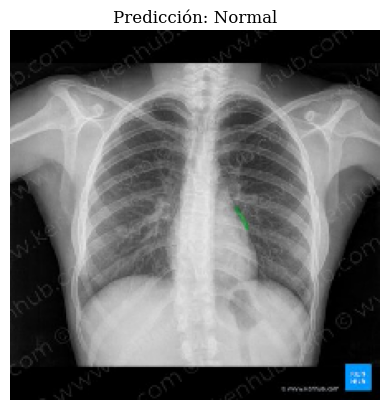

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Asegúrate de definir las dimensiones de la imagen
image_height = 224  # O las dimensiones que estés utilizando
image_width = 224

# Función para cargar y predecir una imagen
def predict_image(img_path, model):
    # Cargar la imagen
    img = image.load_img(img_path, target_size=(image_height, image_width))
    
    # Convertir la imagen a un array de numpy
    img_array = image.img_to_array(img)
    
    # Expande las dimensiones para crear un batch
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalizar la imagen
    img_array /= 255.0
    
    # Realizar la predicción
    predictions = model.predict(img_array)
    
    # Interpretar la salida
    if predictions[0][0] > 0.5:  # Cambiar predictions[0] a predictions[0][0] para acceder al valor correcto
        class_label = 'Normal'
    else:
        class_label = 'COVID-19'  
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f'Predicción: {class_label}')
    plt.axis('off')
    plt.show()

# Usar la función para predecir una imagen
img_path = 'Predicción/pred-img-normal.png'  
predict_image(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


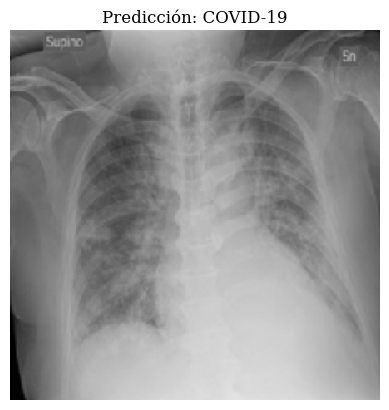

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Asegúrate de definir las dimensiones de la imagen
image_height = 224  # O las dimensiones que estés utilizando
image_width = 224

# Función para cargar y predecir una imagen
def predict_image(img_path, model):
    # Cargar la imagen
    img = image.load_img(img_path, target_size=(image_height, image_width))
    
    # Convertir la imagen a un array de numpy
    img_array = image.img_to_array(img)
    
    # Expande las dimensiones para crear un batch
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalizar la imagen
    img_array /= 255.0
    
    # Realizar la predicción
    predictions = model.predict(img_array)
    
    # Interpretar la salida
    if predictions[0][0] > 0.5:  # Cambiar predictions[0] a predictions[0][0] para acceder al valor correcto
        class_label = 'Normal'
    else:
        class_label = 'COVID-19'  
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f'Predicción: {class_label}')
    plt.axis('off')
    plt.show()

# Usar la función para predecir una imagen
img_path = 'Predicción/pred-img-COVID.png'  
predict_image(img_path, model)

# **Conclusiones**

El rendimiento del modelo es aceptablemente alto, pero parece estar sobreajustado. Sin embargo, predice bien los datos.

# **Despliegue con gradio (pendiente)**

In [28]:
# Importar libreria para guardar el modelo

# Guardar modelo con un nombre basado en pre-entrenador
model.save('MobileNetV2_COVID19_model_JDSR.h5')

In [ ]:
# Guardar con el formato nativo de Keras
model.save('Alpha_RC19P.keras')  # Guardando en formato nativo de Keras
